In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from google.colab.patches import cv2_imshow
import cv2
from skimage.feature import greycomatrix,greycoprops
import os

In [ ]:
#my
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!pip install unrar


In [ ]:
!unrar  x  gdrive/My\ Drive/DATA-FOR-ML/indic-dev.rar

In [ ]:
bengali_text_images = os.listdir("indic-dev/Bengali/")
Devanagiri_text_images = os.listdir("indic-dev/Devanagiri/")
English_text_images = os.listdir("indic-dev/English/")
Gujarathi_text_images = os.listdir("indic-dev/Gujarathi/")
Kannada_text_images = os.listdir("indic-dev/Kannada/")
Malayalam_text_images = os.listdir("indic-dev/Malayalam/")
Odiya_text_images = os.listdir("indic-dev/Odiya/")
Punjabi_text_images = os.listdir("indic-dev/Punjabi/")
Tamil_text_images = os.listdir("indic-dev/Tamil/")
Telugu_text_images = os.listdir("indic-dev/Telugu/")
Urdu_text_images = os.listdir("indic-dev/Urdu/")


In [ ]:
languages = os.listdir('indic-dev/')
languages 

In [ ]:
SIZE= 32 *2

def data_to_numpy(language,text_images):
    data_images = []
    data_labels = []
   
    path = "indic-dev/{}".format(language)
    label = language
    if path:
        c = 0
        for i in text_images :
            img_path = path + '/'+ i
            c = c+1
            img = cv2.imread(img_path, 0) #Reading color images
            #print(img)
            img = cv2.resize(img, (SIZE, SIZE)) #Resize images
                
            data_images.append(img)
            data_labels.append(label)
            if c== 10000:
                break
    # changing to numpy array        

    data_images = np.array(data_images)
    data_labels = np.array(data_labels)

    return (data_images,data_labels)

In [ ]:
Bengali_images,Bengali_labels= data_to_numpy('Bengali',bengali_text_images)
Devanagiri_images,Devanagiri_labels= data_to_numpy('Devanagiri',Devanagiri_text_images)
English_images,English_labels= data_to_numpy('English',English_text_images)
Gujarathi_images,Gujarathi_labels= data_to_numpy('Gujarathi',Gujarathi_text_images)
Kannada_images,Kannada_labels= data_to_numpy('Kannada',Kannada_text_images)
Odiya_images,Odiya_labels= data_to_numpy('Odiya',Odiya_text_images)
Punjabi_images,Punjabi_labels= data_to_numpy('Punjabi',Punjabi_text_images)
Tamil_images,Tamil_labels= data_to_numpy('Tamil',Tamil_text_images)
Telugu_images,Telugu_labels= data_to_numpy('Telugu',Telugu_text_images)
Urdu_images,Urdu_labels= data_to_numpy('Urdu',Urdu_text_images)

In [ ]:
English_images.shape

In [ ]:
Urdu_images.shape

In [ ]:
Bengali_images.shape

In [ ]:
Punjabi_images.shape

In [ ]:
Telugu_images.shape

In [ ]:
Gujarathi_images.shape

In [ ]:
cv2_imshow(Gujarathi_images[2])

In [ ]:
cv2_imshow(Bengali_images[1])

In [ ]:

data_images = np.concatenate((Bengali_images,Devanagiri_images,English_images,Gujarathi_images,Kannada_images,Odiya_images,Punjabi_images,Tamil_images,Telugu_images,
                              Urdu_images),axis=0  )
data_labels = np.concatenate((Bengali_labels,Devanagiri_labels,English_labels,Gujarathi_labels,Kannada_labels,Odiya_labels,Punjabi_labels,Tamil_labels,Telugu_labels,
                              Urdu_labels),axis=0  )

In [ ]:
X = data_images
y = data_labels


In [ ]:
#x1=np.concatenate((Bengali_images),axis=0)


In [ ]:
#x1

In [ ]:
#y1=Bengali_labels

In [ ]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [ ]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
# LANGUAGES ARE ENCODED TO NUMBERS WITH LANGUAGE INDEXS

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43) 

In [ ]:
X_test,y_test

(array([[[  0,   0,   0, ..., 255, 247,   0],
         [  0,  73,  76, ..., 255, 249,  50],
         [  0, 205, 211, ..., 255, 253, 139],
         ...,
         [  0,   0,   0, ..., 223,   0,   0],
         [  0,   0,   0, ..., 126,   0,   0],
         [  0,   0,   0, ...,  72,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ..., 112,   0,   0],
         [  0,   0,   0, ..., 255,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,

In [ ]:
X_train

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 242, 197,   0],
        [  0,   0,   0, ..., 255, 100,   0],
        [  0,   0,   0, ..., 255,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 255,  12,   0],
        [  0,   0,   0, ..., 255,  12,   0],
        [  0,   0,   0, ..., 255,  12,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,  94],
        [  0,   0,   0, ...,   0,   0, 241

In [ ]:
y_train 

array([6, 1, 1, ..., 4, 1, 1])

In [ ]:
# NORMALIZING THE PIXELS
# Normalize pixel values to be between 0 and 1
X_train , X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# div the data in test and validation
# test_size is the validation size
X_test,x_val,y_test,y_val= train_test_split(X,y,test_size=.3,random_state=43)

In [ ]:
y_train

array([6, 1, 1, ..., 4, 1, 1])

In [ ]:
y_test

array([6, 1, 1, ..., 4, 1, 1])

In [ ]:
X_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.94901961,
         0.77254902, 0.        ],
        [0.        , 0.        , 0.        , ..., 1.        ,
         0.39215686, 0.        ],
        [0.        , 0.        , 0.        , ..., 1.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 1.        ,
         0.04705882, 0.        ],
        [0. 

In [ ]:
len(X_test)

70000

In [ ]:
len(X_train)

70000

# MODEL ACCHITECTURE

In [ ]:
from tensorflow import keras
# CNN MODELING

In [ ]:
def create_model():
  model = keras.Sequential()
  #CNN
  model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32*2,32*2,1),name='INPUT-CNN-LAYER' ))
  model.add(keras.layers.MaxPooling2D((2, 2),name='Pooling-layer')) #Polling kayers
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='Conv-layer' ))
  model.add(keras.layers.MaxPooling2D((2, 2),name='2ND-POOLING-LAYER'))
  model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',name='2-CNN-LAYER-LAYER'))
  model.add(keras.layers.MaxPooling2D((2, 2),name='3ND-POOLING-LAYER'))
  model.add(keras.layers.Conv2D(32, (2, 2), activation='relu',name='3-CNN-LAYER-LAYER'))
  model.add(keras.layers.MaxPooling2D((2, 2),name='4TH-POOLING-LAYER'))
  model.add(keras.layers.Conv2D(16, (2, 2), activation='relu',name='4th-CNN-LAYER-LAYER'))
  model.add(keras.layers.Flatten())
  #dense layers
  model.add(keras.layers.Dense(25*25,activation='tanh'))
  model.add(keras.layers.Dense(64, activation='tanh'))
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model 

In [ ]:
model = create_model()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT-CNN-LAYER (Conv2D)    (None, 62, 62, 32)        320       
                                                                 
 Pooling-layer (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 Conv-layer (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 2ND-POOLING-LAYER (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                                           
                                                                 
 2-CNN-LAYER-LAYER (Conv2D)  (None, 12, 12, 64)        36928     
                                                                 
 3ND-POOLING-LAYER (MaxPooli  (None, 6, 6, 64)         0

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=25,validation_data=(X_test,  y_test)) 

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2188/2188 [==============================] - 35s 9ms/step - loss: 0.6289 - accuracy: 0.7745 - val_loss: 1.0045 - val_accuracy: 0.7184
Epoch 2/25
2188/2188 [==============================] - 24s 11ms/step - loss: 0.2378 - accuracy: 0.9193 - val_loss: 1.0477 - val_accuracy: 0.7432
Epoch 3/25
2188/2188 [==============================] - 24s 11ms/step - loss: 0.1550 - accuracy: 0.9492 - val_loss: 0.4063 - val_accuracy: 0.8761
Epoch 4/25
2188/2188 [==============================] - 20s 9ms/step - loss: 0.1186 - accuracy: 0.9611 - val_loss: 0.3793 - val_accuracy: 0.8937
Epoch 5/25
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0950 - accuracy: 0.9697 - val_loss: 0.4222 - val_accuracy: 0.8857
Epoch 6/25
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0864 - accuracy: 0.9719 - val_loss: 0.3237 - val_accuracy: 0.9051
Epoch 7/25
2188/2188 [==============================] - 20s 9ms/step - loss: 0.0761 - accuracy: 0.9754 - val_loss: 0.4062 - val_accuracy: 0

In [ ]:
#my
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
#my
#H=model.fit(X_train, y_train, epochs=10,validation_data=(X_test,  y_test)) 

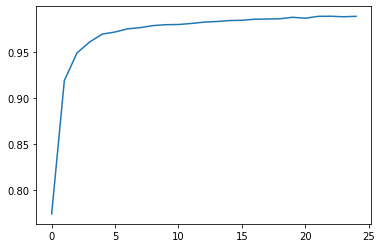

In [ ]:
#my
plt.plot(history.history['accuracy'])

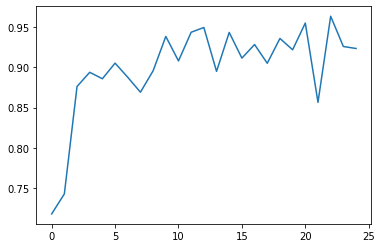

In [ ]:
#my
plt.plot(history.history['val_accuracy'])

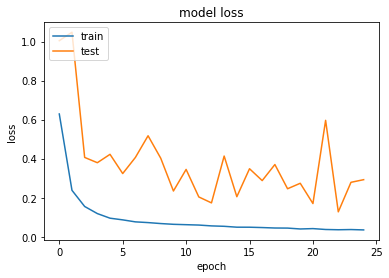

In [ ]:
#my
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

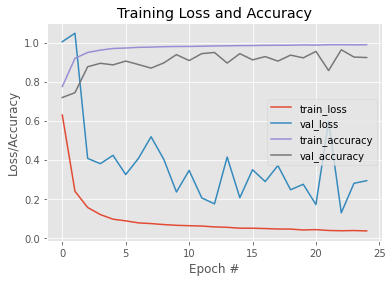

In [ ]:
#my
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot( history.history["loss"], label="train_loss")
plt.plot( history.history["val_loss"], label="val_loss")
plt.plot( history.history["accuracy"], label="train_accuracy")
plt.plot( history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

2188/2188 - 6s - loss: 0.2923 - accuracy: 0.9232 - 6s/epoch - 3ms/step
0.9231714010238647


In [ ]:
# SAVING THE MODEL

In [ ]:
model.save("indic_script_detection_model.h5")  # we can save the model and reload it at anytime in the future


In [ ]:
# Loading the model
new_model = tf.keras.models.load_model('indic_script_detection_model.h5')

In [ ]:
# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT-CNN-LAYER (Conv2D)    (None, 62, 62, 32)        320       
                                                                 
 Pooling-layer (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 Conv-layer (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 2ND-POOLING-LAYER (MaxPooli  (None, 14, 14, 64)       0         
 ng2D)                                                           
                                                                 
 2-CNN-LAYER-LAYER (Conv2D)  (None, 12, 12, 64)        36928     
                                                                 
 3ND-POOLING-LAYER (MaxPooli  (None, 6, 6, 64)         0

In [ ]:
 X_train[5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Making model predict

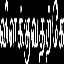

7


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_train[5]*255)
print(y_train[5])

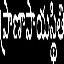

8


In [ ]:
cv2_imshow(X_train[45]*255)
print(y_train[45])

In [ ]:
model.predict(X_train[:5])

array([[5.59627224e-05, 1.59695034e-03, 5.91013394e-03, 6.73543836e-04,
        7.20987009e-05, 2.67399937e-05, 9.91211712e-01, 4.32959961e-04,
        1.98266698e-05, 1.08591252e-07],
       [2.28256467e-04, 9.98632967e-01, 8.73377871e-07, 7.80581249e-05,
        9.70939098e-08, 3.47158493e-06, 1.05488079e-03, 1.96887541e-07,
        1.13220857e-07, 1.11594807e-06],
       [3.63898842e-04, 9.98695552e-01, 6.79340474e-07, 1.00648220e-04,
        7.06109731e-08, 2.41568750e-06, 8.33030383e-04, 2.91297908e-07,
        1.15179404e-07, 3.31644242e-06],
       [2.30604105e-08, 2.39053975e-06, 7.52815595e-06, 4.54684450e-05,
        2.10464932e-05, 4.90479260e-06, 1.40157468e-07, 3.53184669e-06,
        1.87280111e-05, 9.99896288e-01],
       [6.81701025e-08, 1.09318773e-06, 5.15919419e-06, 6.37571429e-06,
        5.54965663e-05, 2.80434460e-06, 2.21410005e-07, 2.31679260e-05,
        1.89691291e-05, 9.99886632e-01]], dtype=float32)

In [ ]:
y_train[:5]

array([6, 1, 1, 9, 9])

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
X_train[1].shape

(64, 64)

# ANN APPROCH with glsm

In [ ]:
model = keras.Sequential([
      keras.layers.LSTM(units=25*25,return_sequences=True,input_shape=(25,1)),
      keras.layers.LSTM(units=25*25*25,return_sequences=True),
      #keras.layers.Flatten(),
      #keras.layers.Conv2D(25*25,activation='tahn',kernel_),
      #keras.layers.Conv2D(25*25*25,activation='relu'),
      #tf.keras.layers.ConvLSTM1D(),
      #keras.layers.Dense(125,activation='tanh'),
      #tf.keras.layers.Dropout(
      #    0.1
      #),
      keras.layers.Dense(25*25*25,activation='tanh'),
      #keras.layers.Dense(25*25*25,activation='tanh'),
      #keras.layers.Flatten(),
      #tf.keras.layers.Dropout(
      #    0.1
      #), 
    
      #keras.layers.Dense(25*25*25,activation='tanh'),
      #tf.keras.layers.Dropout(
      #    0.1
      #),
      keras.layers.Dense(25*25,activation='tanh'),
      keras.layers.Dense(10,activation='softmax')
      
])

ResourceExhaustedError: ignored

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(X_train,y_train,epochs=100)

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
# USE LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=150))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

In [ ]:
# THE BEST ACCURACY THE WE GET FROM BASE NEURAL NET  is : 0.5150
# we will now further change the neural net structure and do hyperperametertuning

In [ ]:
scores = model.evaluate(X_test, y_test)

In [ ]:
scores